# Capstone Project - The Battle of the Neighborhoods

# Using Foursqurea to identify best neighbourhoods in Greater Melbourne to visit

Due to the Covid 19 pandamic small businessses have been effected in the areas of food and entertainment. Since Victoria has now come out of the pandemic, people can now travel around the state and experiance what Melbourne has to offer while helping out the businesses in need.

From this project we expect to identify places to visit within the Greater Melbourne area and recommend them to people who wants to visit.

# Data Exploration

In [1]:
#!pip install bs4
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('Install required apps')

Install required apps


In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [3]:
# Local Government areas of Victoria
html_data= requests.get("https://en.wikipedia.org/wiki/Local_government_areas_of_Victoria").text
soup = BeautifulSoup(html_data, "html.parser")

In [4]:
rows=[]
table=soup.find('a',title="City of Melbourne").parent.parent.parent.parent.parent.parent
for child in table.findAll('tr'):
    row = []
    for td in child:
        if (td.string):
            val = td.string.strip('\t\r\n')
            row.append(val)
    rows.append(list(filter(None, row)))
df = pd.DataFrame(rows[1:32],columns=['Local government','Council','Region','Area','Population','Pop Density','Councilors'])
df['Latitude'] = ''
df['Longitude'] = ''
df.drop(['Councilors'],axis=1,inplace=True)
df

,Local government,Council,Region,Area,Population,Pop Density,Latitude,Longitude
0,City of Melbourne,Melbourne,Inner Melbourne,37,"169,961","11,897",,
1,City of Port Phillip,St Kilda,Inner Melbourne,21,"113,200","13,961",,
2,City of Stonnington,Malvern,Inner Melbourne,26,"116,207","11,576",,
3,City of Yarra,Richmond,Inner Melbourne,20,"98,521","12,758",,
4,City of Banyule,Greensborough,Metropolitan Melbourne,63,"130,237","5,354",,
5,City of Bayside,Sandringham,Metropolitan Melbourne,37,"105,718","7,400",,
6,City of Boroondara,Camberwell,Metropolitan Melbourne,60,"181,289","7,826",,
7,City of Darebin,Preston,Metropolitan Melbourne,54,"161,609","7,751",,
8,City of Glen Eira,Caulfield North,Metropolitan Melbourne,39,"153,858","10,218",,
9,City of Hobsons Bay,Altona,Metropolitan Melbourne,64,"96,470","3,904",,


In [5]:
for i in df['Council']:
    geolocator = Nominatim(user_agent="MelbExlorer")
    location = geolocator.geocode(i+',Victoria,Australia')
    df.loc[df['Council']==i,'Latitude'] = location.latitude
    df.loc[df['Council']==i,'Longitude'] = location.longitude
df

,Local government,Council,Region,Area,Population,Pop Density,Latitude,Longitude
0,City of Melbourne,Melbourne,Inner Melbourne,37,"169,961","11,897",-37.814218,144.963161
1,City of Port Phillip,St Kilda,Inner Melbourne,21,"113,200","13,961",-37.863826,144.981637
2,City of Stonnington,Malvern,Inner Melbourne,26,"116,207","11,576",-37.858429,145.034764
3,City of Yarra,Richmond,Inner Melbourne,20,"98,521","12,758",-37.820395,145.002515
4,City of Banyule,Greensborough,Metropolitan Melbourne,63,"130,237","5,354",-37.704028,145.108216
5,City of Bayside,Sandringham,Metropolitan Melbourne,37,"105,718","7,400",-37.950301,145.004388
6,City of Boroondara,Camberwell,Metropolitan Melbourne,60,"181,289","7,826",-37.838462,145.074077
7,City of Darebin,Preston,Metropolitan Melbourne,54,"161,609","7,751",-37.741866,145.007821
8,City of Glen Eira,Caulfield North,Metropolitan Melbourne,39,"153,858","10,218",-37.870828,145.021801
9,City of Hobsons Bay,Altona,Metropolitan Melbourne,64,"96,470","3,904",-37.867159,144.829497


In [6]:
df['Population'] = df['Population'].str.replace(',', '').astype(int)
df['Pop Density'] = df['Pop Density'].str.replace(',', '').astype(int)

# Exploratory Data Analysis

<BarContainer object of 31 artists>

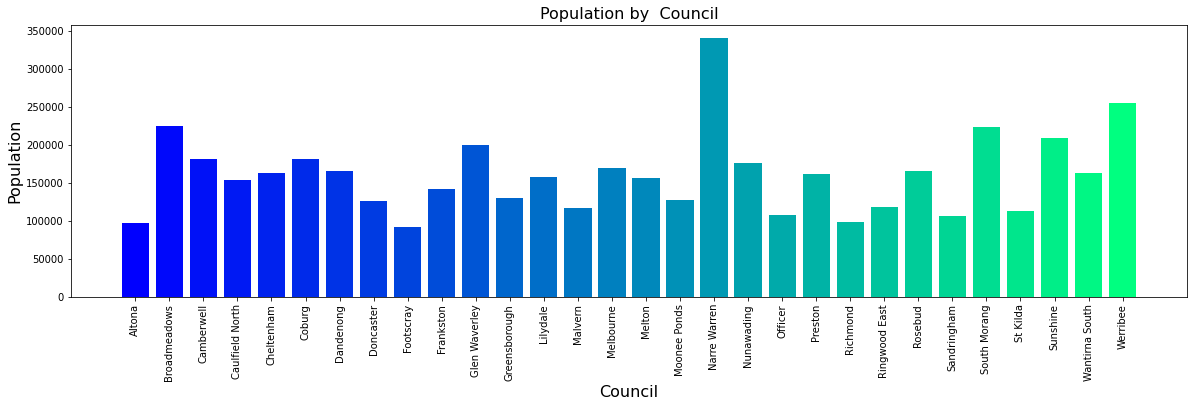

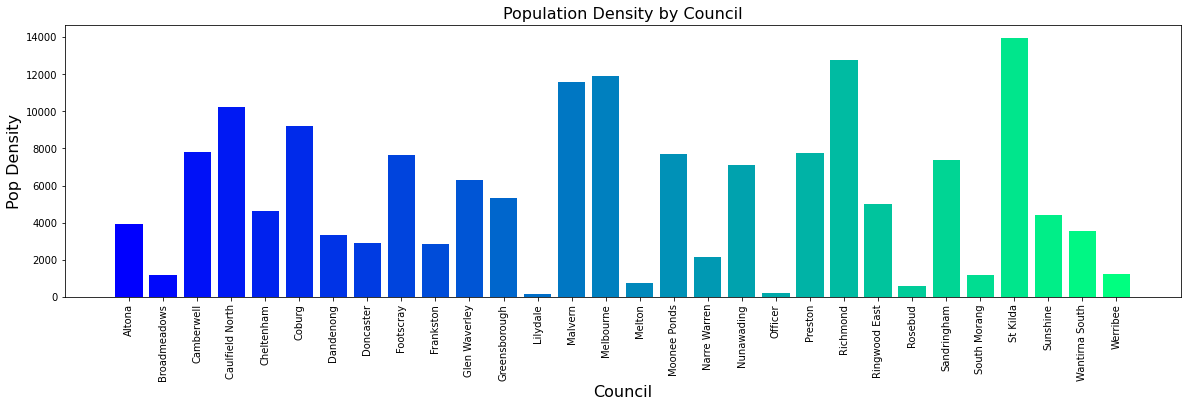

In [8]:
import matplotlib.pyplot as plt

df1 = df.sort_values('Council')
pop = df1['Population']
council = df1['Council']
popden = df1['Pop Density']

colors = cm.winter(np.linspace(0, 1, len(council)))

plt.figure(figsize = (20, 5))
plt.xticks(rotation = 90)
plt.ylabel("Population", fontsize = 16)
plt.xlabel("Council", fontsize = 16)
plt.title("Population by  Council", fontsize = 16)
plt.bar(council, pop, color = colors)

plt.figure(figsize = (20, 5))
plt.xticks(rotation = 90)
plt.ylabel("Pop Density", fontsize = 16)
plt.xlabel("Council", fontsize = 16)
plt.title("Population Density by Council", fontsize = 16)
plt.bar(council, popden, color = colors)

In [9]:
map_melb = folium.Map(location=[-37.8142,144.963], zoom_start=9.5)

# add markers to map
for lat, lng, council in zip(df['Latitude'], df['Longitude'], df['Council']):
    label = '{}'.format(council)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melb)  
    
map_melb

# Foursquare API

In [11]:
CLIENT_ID = 'IUHAUY4S0W1EBB51G1YWPZGRF1ST0KM5HCVYIPVWLNCJQNJ5' # your Foursquare ID
CLIENT_SECRET = 'GQY5G5LWIKR5ADXAUGEL342VM5ZUPMXPS4M2242Q1SCTETDF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [12]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION
)

category_results = requests.get(url).json()

In [13]:
categories = len(category_results['response']['categories'])
catagory_index = []
for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(i,venues)
    catagory_index.append(venues)
    sub_venues=[]
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues.append(category_results['response']['categories'][i]['categories'][j]['name'])
        
    print(sub_venues)
    print('\n')
print(catagory_index)

0 Arts & Entertainment
['Amphitheater', 'Aquarium', 'Arcade', 'Art Gallery', 'Bowling Alley', 'Casino', 'Circus', 'Comedy Club', 'Concert Hall', 'Country Dance Club', 'Disc Golf', 'Escape Room', 'Exhibit', 'General Entertainment', 'Go Kart Track', 'Historic Site', 'Karaoke Box', 'Laser Tag', 'Memorial Site', 'Mini Golf', 'Movie Theater', 'Museum', 'Music Venue', 'Pachinko Parlor', 'Performing Arts Venue', 'Pool Hall', 'Public Art', 'Racecourse', 'Racetrack', 'Roller Rink', 'Salsa Club', 'Samba School', 'Stadium', 'Theme Park', 'Tour Provider', 'VR Cafe', 'Water Park', 'Zoo']


1 College & University
['College Academic Building', 'College Administrative Building', 'College Auditorium', 'College Bookstore', 'College Cafeteria', 'College Classroom', 'College Gym', 'College Lab', 'College Library', 'College Quad', 'College Rec Center', 'College Residence Hall', 'College Stadium', 'College Theater', 'Community College', 'Fraternity House', 'General College & University', 'Law School', 'Medi

# Explore Greater Melbourne

In [14]:
venues_activities = []
venues_food = []
venues_services = []

req_activities = ['Arts & Entertainment','Event', 'Nightlife Spot', 'Outdoors & Recreation']
req_food = ['Food']
req_services = ['Shop & Service','Travel & Transport']

for i in req_activities:
    key= catagory_index.index(i)
    venues = category_results['response']['categories'][key]['name']
    venues_activities.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        venues_activities.append(sub_venues)

for i in req_food:
    key= catagory_index.index(i)
    venues = category_results['response']['categories'][key]['name']
    venues_food.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        venues_food.append(sub_venues)
        
for i in req_services:
    key= catagory_index.index(i)
    venues = category_results['response']['categories'][key]['name']
    venues_services.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        venues_services.append(sub_venues)


In [15]:
def getVenues(councils, latitudes, longitudes, venue_category, radius=2000, LIMIT=100 ):
    venueArray=[]
    for council, lat, lng in zip(councils, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT
        )
            
        jsonOut = requests.get(url).json()["response"]['groups'][0]['items']
        
        venueArray.append([(
            council, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in jsonOut])

    venues = pd.DataFrame([item for venueArray in venueArray for item in venueArray])
    venues.columns = ['Council', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    venues = venues[venues['Venue Category'].isin(venue_category)]
    
    return(venues)

# Activities and things to do around Melbourne

In [16]:
ActivityVenues = getVenues(councils=df['Council'],latitudes=df['Latitude'],longitudes=df['Longitude'],venue_category=venues_activities)

In [17]:
ActivityVenues.reset_index(drop=True,inplace=True)
ActivityVenues

,Council,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melbourne,-37.814218,144.963161,Chuckle Park,-37.815075,144.963908,Bar
1,Melbourne,-37.814218,144.963161,Whitehart,-37.812781,144.961973,Bar
2,Melbourne,-37.814218,144.963161,RMIT Capitol Theatre,-37.814928,144.965397,Movie Theater
3,Melbourne,-37.814218,144.963161,The Wheeler Centre,-37.810241,144.965102,General Entertainment
4,Melbourne,-37.814218,144.963161,Cabinet Bar & Balcony,-37.814062,144.966320,Bar
...,...,...,...,...,...,...,...
161,Werribee,-37.907984,144.641675,Werribee Racecourse,-37.902589,144.630589,Racetrack
162,Werribee,-37.907984,144.641675,Wyndham Vale football ground,-37.902094,144.625323,Recreation Center
163,Werribee,-37.907984,144.641675,Harpley Adventure Playground,-37.901840,144.620782,Playground
164,Lilydale,-37.755670,145.347548,Lillydale Lake,-37.764990,145.356941,Lake


In [18]:
ActivityVenues['Venue Category'].nunique()

32

In [19]:
map_melb_activity = folium.Map(location=[-37.8142,144.963], zoom_start=9.5)

# add markers to map
for lat, lng, venue,cat in zip(ActivityVenues['Venue Latitude'], ActivityVenues['Venue Longitude'], ActivityVenues['Venue'],ActivityVenues['Venue Category']):
    label = '{},{}'.format(venue,cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melb_activity)  
    
map_melb_activity

# Resturents and Eates around Melbourne

In [20]:
FoodVenues = getVenues(councils=df['Council'],latitudes=df['Latitude'],longitudes=df['Longitude'],venue_category=venues_food)

In [21]:
FoodVenues.reset_index(drop=True,inplace=True)
FoodVenues

,Council,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melbourne,-37.814218,144.963161,Tipo 00,-37.813527,144.961978,Italian Restaurant
1,Melbourne,-37.814218,144.963161,Brother Baba Budan,-37.813445,144.962137,Coffee Shop
2,Melbourne,-37.814218,144.963161,Trattoria Emilia,-37.815220,144.962636,Italian Restaurant
3,Melbourne,-37.814218,144.963161,Nosh,-37.815396,144.962999,Asian Restaurant
4,Melbourne,-37.814218,144.963161,Little Rogue Coffee,-37.810986,144.964059,Coffee Shop
...,...,...,...,...,...,...,...
841,Lilydale,-37.755670,145.347548,The Lilydale General,-37.751226,145.348406,Café
842,Lilydale,-37.755670,145.347548,Round Bird Can't Fly,-37.757578,145.349097,Café
843,Lilydale,-37.755670,145.347548,Nando's,-37.757124,145.354546,Portuguese Restaurant
844,Lilydale,-37.755670,145.347548,Subway,-37.757530,145.349859,Sandwich Place


In [22]:
FoodVenues['Venue Category'].unique()

array(['Italian Restaurant', 'Coffee Shop', 'Asian Restaurant',
       'Dessert Shop', 'Tea Room', 'Donut Shop', 'Café', 'Pizza Place',
       'Bagel Shop', 'Creperie', 'Scandinavian Restaurant', 'BBQ Joint',
       'Bubble Tea Shop', 'Juice Bar', 'Bakery', 'Burger Joint',
       'Spanish Restaurant', 'Middle Eastern Restaurant',
       'Sandwich Place', 'Indian Restaurant', 'Mexican Restaurant',
       'Australian Restaurant', 'Seafood Restaurant',
       'Vegetarian / Vegan Restaurant', 'Breakfast Spot', 'Deli / Bodega',
       'Diner', 'Gastropub', 'Fish & Chips Shop', 'Polish Restaurant',
       'Turkish Restaurant', 'Fast Food Restaurant',
       'Dumpling Restaurant', 'Steakhouse', 'Portuguese Restaurant',
       'Fried Chicken Joint', 'Restaurant', 'Greek Restaurant',
       'French Restaurant', 'Food Truck', 'American Restaurant',
       'Salad Place', 'Food Court', 'Mediterranean Restaurant',
       'Eastern European Restaurant', 'Sri Lankan Restaurant',
       'Latin American

In [23]:
FoodVenues.groupby('Council').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Council,,,,,,
Altona,7,7,7,7,7,7
Broadmeadows,15,15,15,15,15,15
Camberwell,46,46,46,46,46,46
Caulfield North,50,50,50,50,50,50
Cheltenham,32,32,32,32,32,32
Coburg,54,54,54,54,54,54
Dandenong,16,16,16,16,16,16
Doncaster,30,30,30,30,30,30
Footscray,44,44,44,44,44,44


# Analyze Melbourne Eats

In [24]:
# one hot encoding
FoodVenues_onehot = pd.get_dummies(FoodVenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
FoodVenues_onehot['Council'] = FoodVenues['Council'] 

# move neighborhood column to the first column
fixed_columns = [FoodVenues_onehot.columns[-1]] + list(FoodVenues_onehot.columns[:-1])
FoodVenues_onehot = FoodVenues_onehot[fixed_columns]

FoodVenues_onehot.head()

,Council,Afghan Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,...,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Snack Place,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Tea Room,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Melbourne,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
FoodVenues_onehot.shape

(846, 53)

In [26]:
FoodVenues_onehot = FoodVenues_onehot.groupby('Council').mean().reset_index()
FoodVenues_onehot

,Council,Afghan Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,...,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Snack Place,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Tea Room,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Altona,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.142857,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Broadmeadows,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,...,0.133333,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000
2,Camberwell,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.065217,0.0,0.021739,...,0.000000,0.000000,0.021739,0.0000,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000
3,Caulfield North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.0,0.020000,...,0.020000,0.000000,0.000000,0.0000,0.020000,0.000000,0.020000,0.000000,0.040000,0.000000
4,Cheltenham,0.000000,0.031250,0.000000,0.000000,0.000000,0.031250,0.000000,0.0,0.000000,...,0.062500,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000
5,Coburg,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.0,0.018519,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000
6,Dandenong,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Doncaster,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.0,0.000000,...,0.033333,0.000000,0.033333,0.0000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333
8,Footscray,0.000000,0.022727,0.045455,0.022727,0.000000,0.000000,0.068182,0.0,0.000000,...,0.022727,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Frankston,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.058824,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
FoodVenues_onehot.shape


(30, 53)

In [28]:
num_top_venues = 5

for hood in FoodVenues_onehot['Council']:
    print("----"+hood+"----")
    temp = FoodVenues_onehot[FoodVenues_onehot['Council'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altona----
                venue  freq
0                Café  0.43
1  Italian Restaurant  0.14
2  Seafood Restaurant  0.14
3        Burger Joint  0.14
4         Pizza Place  0.14


----Broadmeadows----
                  venue  freq
0  Fast Food Restaurant  0.27
1                  Café  0.13
2        Sandwich Place  0.13
3           Pizza Place  0.13
4    Turkish Restaurant  0.07


----Camberwell----
                venue  freq
0                Café  0.52
1  Italian Restaurant  0.07
2              Bakery  0.07
3         Coffee Shop  0.04
4         Pizza Place  0.04


----Caulfield North----
                       venue  freq
0                       Café  0.44
1         Italian Restaurant  0.08
2       Fast Food Restaurant  0.06
3                Pizza Place  0.04
4  Middle Eastern Restaurant  0.04


----Cheltenham----
                  venue  freq
0                  Café  0.31
1  Fast Food Restaurant  0.12
2           Coffee Shop  0.12
3        Sandwich Place  0.06
4    Italian Resta

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Council']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Food_venues_sorted = pd.DataFrame(columns=columns)
Food_venues_sorted['Council'] = FoodVenues_onehot['Council']

for ind in np.arange(FoodVenues_onehot.shape[0]):
    Food_venues_sorted.iloc[ind, 1:] = return_most_common_venues(FoodVenues_onehot.iloc[ind, :], num_top_venues)

Food_venues_sorted.head()

,Council,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altona,Café,Italian Restaurant,Seafood Restaurant,Burger Joint,Pizza Place,Afghan Restaurant,Portuguese Restaurant,Indian Restaurant,Juice Bar,Kebab Restaurant
1,Broadmeadows,Fast Food Restaurant,Café,Sandwich Place,Pizza Place,Turkish Restaurant,Australian Restaurant,Italian Restaurant,Juice Bar,Portuguese Restaurant,Afghan Restaurant
2,Camberwell,Café,Italian Restaurant,Bakery,Coffee Shop,Pizza Place,Indian Restaurant,Mexican Restaurant,Fish & Chips Shop,Portuguese Restaurant,Restaurant
3,Caulfield North,Café,Italian Restaurant,Fast Food Restaurant,Pizza Place,Middle Eastern Restaurant,Coffee Shop,Burger Joint,Bakery,Greek Restaurant,Turkish Restaurant
4,Cheltenham,Café,Fast Food Restaurant,Coffee Shop,Sandwich Place,Italian Restaurant,Portuguese Restaurant,Fish & Chips Shop,Juice Bar,Mexican Restaurant,Burger Joint


# Cluster Neighborhoods

In [31]:
# set number of clusters
kclusters = 5

grouped_clustering = FoodVenues_onehot.drop('Council', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 0, 3, 3, 2, 1, 0, 1])

In [32]:
# add clustering labels
Food_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Food_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Food_merged = df.join(Food_venues_sorted.set_index('Council'), on='Council')

Food_merged.head() # check the last columns!

,Local government,Council,Region,Area,Population,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of Melbourne,Melbourne,Inner Melbourne,37,169961,11897,-37.814218,144.963161,1,Coffee Shop,Asian Restaurant,Italian Restaurant,Café,Pizza Place,Dessert Shop,Sandwich Place,Scandinavian Restaurant,Middle Eastern Restaurant,Donut Shop
1,City of Port Phillip,St Kilda,Inner Melbourne,21,113200,13961,-37.863826,144.981637,1,Café,Pizza Place,Breakfast Spot,Australian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Burger Joint,Coffee Shop,Mexican Restaurant,Diner
2,City of Stonnington,Malvern,Inner Melbourne,26,116207,11576,-37.858429,145.034764,0,Café,Italian Restaurant,Coffee Shop,Middle Eastern Restaurant,Pizza Place,Fast Food Restaurant,Sandwich Place,Fish & Chips Shop,Portuguese Restaurant,Dumpling Restaurant
3,City of Yarra,Richmond,Inner Melbourne,20,98521,12758,-37.820395,145.002515,0,Café,Vegetarian / Vegan Restaurant,Breakfast Spot,Pizza Place,Greek Restaurant,Bakery,Gastropub,Burger Joint,Australian Restaurant,BBQ Joint
4,City of Banyule,Greensborough,Metropolitan Melbourne,63,130237,5354,-37.704028,145.108216,3,Café,Fast Food Restaurant,Juice Bar,Seafood Restaurant,Burger Joint,Afghan Restaurant,Portuguese Restaurant,Italian Restaurant,Kebab Restaurant,Latin American Restaurant


In [33]:
# Visualize Clusters
# create map
map_clusters = folium.Map(location=[-37.8142,144.963], zoom_start=9.5)
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Food_merged['Latitude'], Food_merged['Longitude'], Food_merged['Council'], Food_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

# Cluster Analysis

In [34]:
Food_merged.loc[Food_merged['Cluster Labels'] == 0, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Malvern,11576,-37.858429,145.034764,0,Café,Italian Restaurant,Coffee Shop,Middle Eastern Restaurant,Pizza Place,Fast Food Restaurant,Sandwich Place,Fish & Chips Shop,Portuguese Restaurant,Dumpling Restaurant
3,Richmond,12758,-37.820395,145.002515,0,Café,Vegetarian / Vegan Restaurant,Breakfast Spot,Pizza Place,Greek Restaurant,Bakery,Gastropub,Burger Joint,Australian Restaurant,BBQ Joint
5,Sandringham,7400,-37.950301,145.004388,0,Café,Pizza Place,Sandwich Place,Bakery,Fast Food Restaurant,Coffee Shop,Spanish Restaurant,French Restaurant,Australian Restaurant,Latin American Restaurant
6,Camberwell,7826,-37.838462,145.074077,0,Café,Italian Restaurant,Bakery,Coffee Shop,Pizza Place,Indian Restaurant,Mexican Restaurant,Fish & Chips Shop,Portuguese Restaurant,Restaurant
8,Caulfield North,10218,-37.870828,145.021801,0,Café,Italian Restaurant,Fast Food Restaurant,Pizza Place,Middle Eastern Restaurant,Coffee Shop,Burger Joint,Bakery,Greek Restaurant,Turkish Restaurant
9,Altona,3904,-37.867159,144.829497,0,Café,Italian Restaurant,Seafood Restaurant,Burger Joint,Pizza Place,Afghan Restaurant,Portuguese Restaurant,Indian Restaurant,Juice Bar,Kebab Restaurant
12,Footscray,7635,-37.801520,144.902587,0,Café,Bakery,Burger Joint,Coffee Shop,Asian Restaurant,Italian Restaurant,Pizza Place,Food Truck,Fish & Chips Shop,Deli / Bodega
14,Moonee Ponds,7703,-37.765935,144.919261,0,Café,Italian Restaurant,Bakery,Sandwich Place,Burger Joint,Greek Restaurant,Pizza Place,Sri Lankan Restaurant,Steakhouse,Gastropub


In [35]:
Food_merged.loc[Food_merged['Cluster Labels'] == 1, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Melbourne,11897,-37.814218,144.963161,1,Coffee Shop,Asian Restaurant,Italian Restaurant,Café,Pizza Place,Dessert Shop,Sandwich Place,Scandinavian Restaurant,Middle Eastern Restaurant,Donut Shop
1,St Kilda,13961,-37.863826,144.981637,1,Café,Pizza Place,Breakfast Spot,Australian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Burger Joint,Coffee Shop,Mexican Restaurant,Diner
11,Doncaster,2877,-37.782869,145.122320,1,Café,Dessert Shop,Pizza Place,Fast Food Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Food Court
13,Glen Waverley,6319,-37.879668,145.162916,1,Sri Lankan Restaurant,Café,Italian Restaurant,Bubble Tea Shop,Dessert Shop,Kebab Restaurant,Latin American Restaurant,Food Court,Sandwich Place,Coffee Shop
20,Frankston,2826,-38.144473,145.126881,1,Café,Italian Restaurant,Burger Joint,Fast Food Restaurant,Gastropub,Juice Bar,Fish & Chips Shop,Dumpling Restaurant,Pizza Place,Portuguese Restaurant
26,Rosebud,593,-38.371032,144.909512,1,Bakery,Greek Restaurant,Burger Joint,Pizza Place,Sandwich Place,Fast Food Restaurant,Bistro,Donut Shop,Seafood Restaurant,Middle Eastern Restaurant


In [36]:
Food_merged.loc[Food_merged['Cluster Labels'] == 2, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Sunshine,4395,-37.788095,144.832600,2,Fast Food Restaurant,Café,Afghan Restaurant,Bakery,Sandwich Place,Pizza Place,Restaurant,Polish Restaurant,Italian Restaurant,Juice Bar
19,Narre Warren,2156,-38.027657,145.303626,2,Fast Food Restaurant,Café,Portuguese Restaurant,Australian Restaurant,Sandwich Place,Burger Joint,Donut Shop,Pizza Place,Italian Restaurant,Coffee Shop
21,Dandenong,3309,-37.987490,145.214792,2,Fast Food Restaurant,Café,Afghan Restaurant,Snack Place,Juice Bar,Kebab Restaurant,Portuguese Restaurant,Indian Restaurant,Bakery,Asian Restaurant
22,Broadmeadows,1153,-37.682939,144.919575,2,Fast Food Restaurant,Café,Sandwich Place,Pizza Place,Turkish Restaurant,Australian Restaurant,Italian Restaurant,Juice Bar,Portuguese Restaurant,Afghan Restaurant
23,Wantirna South,3552,-37.873790,145.221747,2,Fast Food Restaurant,Café,Australian Restaurant,Fried Chicken Joint,Mexican Restaurant,Food Court,Pizza Place,Portuguese Restaurant,Sandwich Place,Creperie
24,Ringwood East,4989,-37.811868,145.250299,2,Fast Food Restaurant,Café,Greek Restaurant,Gastropub,Restaurant,Coffee Shop,Fish & Chips Shop,Portuguese Restaurant,Juice Bar,Sandwich Place
25,Melton,769,-37.683571,144.582845,2,Fast Food Restaurant,Diner,Restaurant,Sandwich Place,Portuguese Restaurant,Coffee Shop,Pizza Place,Italian Restaurant,Bakery,Australian Restaurant
28,South Morang,1180,-37.649239,145.067241,2,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Pizza Place,Portuguese Restaurant,Indian Restaurant,Fish & Chips Shop,Food Court


In [37]:
Food_merged.loc[Food_merged['Cluster Labels'] == 3, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Greensborough,5354,-37.704028,145.108216,3,Café,Fast Food Restaurant,Juice Bar,Seafood Restaurant,Burger Joint,Afghan Restaurant,Portuguese Restaurant,Italian Restaurant,Kebab Restaurant,Latin American Restaurant
7,Preston,7751,-37.741866,145.007821,3,Café,Fast Food Restaurant,Bakery,Sandwich Place,Italian Restaurant,Pizza Place,Burger Joint,Coffee Shop,Food Truck,Indian Restaurant
10,Cheltenham,4651,-37.967008,145.054695,3,Café,Fast Food Restaurant,Coffee Shop,Sandwich Place,Italian Restaurant,Portuguese Restaurant,Fish & Chips Shop,Juice Bar,Mexican Restaurant,Burger Joint
15,Coburg,9229,-37.745041,144.963992,3,Café,Coffee Shop,Middle Eastern Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Burger Joint,Fish & Chips Shop,Falafel Restaurant,Portuguese Restaurant
16,Nunawading,7130,-37.820503,145.175129,3,Café,Fast Food Restaurant,Pizza Place,Middle Eastern Restaurant,Fried Chicken Joint,Italian Restaurant,Food Truck,Mexican Restaurant,Sandwich Place,Indian Restaurant
27,Greensborough,389,-37.704028,145.108216,3,Café,Fast Food Restaurant,Juice Bar,Seafood Restaurant,Burger Joint,Afghan Restaurant,Portuguese Restaurant,Italian Restaurant,Kebab Restaurant,Latin American Restaurant
29,Werribee,1220,-37.907984,144.641675,3,Café,Fast Food Restaurant,Asian Restaurant,Indian Restaurant,Sandwich Place,Portuguese Restaurant,Middle Eastern Restaurant,Burger Joint,Coffee Shop,Pizza Place
30,Lilydale,166,-37.755670,145.347548,3,Café,Portuguese Restaurant,Fast Food Restaurant,Breakfast Spot,Sandwich Place,Afghan Restaurant,Italian Restaurant,Juice Bar,Kebab Restaurant,Latin American Restaurant


In [38]:

Food_merged.loc[Food_merged['Cluster Labels'] == 4, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Officer,216,-38.066274,145.411613,4,Café,Afghan Restaurant,Portuguese Restaurant,Indian Restaurant,Italian Restaurant,Juice Bar,Kebab Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant


In [39]:
Food_merged.loc[Food_merged['Cluster Labels'] == 5, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
